In [1]:
%load_ext watermark
%watermark

2017-03-28T02:14:57

CPython 2.7.6
IPython 5.2.2

compiler   : GCC 4.8.4
system     : Linux
release    : 4.4.43-boot2docker
machine    : x86_64
processor  : x86_64
CPU cores  : 1
interpreter: 64bit


In [2]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

1.0.0


In [3]:
%matplotlib inline
from matplotlib import pyplot as plt

In [4]:
def generate_weight_and_bias(input_dim):
    # 1 x input_dim 行向量，相当于课程中的 w^T
    w = tf.Variable(tf.random_uniform([1, input_dim], -1, 1))
    # b, 1 * 1
    bias = tf.Variable(tf.zeros([1, 1]))
    return (w, bias)

In [6]:
w0 = np.random.rand()
b0 = 0

print w0, b0

0.985899477723 0


In [7]:
x = np.concatenate((np.random.rand(1, 50), np.random.rand(1, 50) + 1), axis=1)
x = x.reshape(100,1)

noise = np.random.normal(size=len(x)).reshape(x.shape) * 0.1
y = w0 * x + b0 + noise

print x.shape
print y.shape
print noise.shape


(100, 1)
(100, 1)
(100, 1)


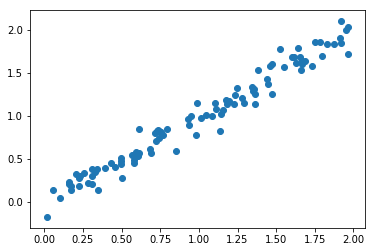

In [8]:
plt.scatter(x, y)

In [9]:
tf.reset_default_graph()

In [10]:
x_train = tf.placeholder('float32')
y_train = tf.placeholder('float32')

In [12]:
w, b = generate_weight_and_bias(1)
print w
print b

Tensor("Variable_2/read:0", shape=(1, 1), dtype=float32)
Tensor("Variable_3/read:0", shape=(1, 1), dtype=float32)


In [13]:

y_bar = w * x_train + b

cost = tf.reduce_mean(tf.square(y_bar - y_train))

In [14]:
mini_batch_size = 1

In [15]:
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

costs = []
w_out = 0
b_out = 0
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    offset = 0
    epoch = 500
    data_size = len(x) 
    iteration = epoch * data_size / mini_batch_size
    for i in range(iteration):
        offset = (i * mini_batch_size) % data_size 
        x_mini_batch = x[offset : offset + mini_batch_size]
        y_mini_batch = y[offset : offset + mini_batch_size]
        feed_dict = {x_train:x_mini_batch, y_train:y_mini_batch}
        sess.run(train_step, feed_dict=feed_dict)  
        cost_i = sess.run(cost, feed_dict=feed_dict)
        costs.append(cost_i)
        if i % 500 == 0:
            print i
            w_out = sess.run(w)
            b_out = sess.run(b)
            print cost_i
            print w_out
            print b_out


0
0.352173
[[-0.54190773]]
[[ 0.01214938]]
500
0.0390876
[[ 0.7894085]]
[[ 0.279888]]
1000
0.0016492
[[ 0.93446034]]
[[ 0.0657653]]
1500
8.91913e-06
[[ 0.97471482]]
[[ 0.0063423]]
2000
0.000227566
[[ 0.98588616]]
[[-0.01014851]]
2500
0.000340146
[[ 0.98898643]]
[[-0.01472515]]
3000
0.000375393
[[ 0.989847]]
[[-0.01599551]]
3500
0.000385477
[[ 0.99008566]]
[[-0.01634782]]
4000
0.000388301
[[ 0.99015206]]
[[-0.01644574]]
4500
0.000389088
[[ 0.99017054]]
[[-0.01647296]]
5000
0.000389311
[[ 0.99017555]]
[[-0.01648057]]
5500
0.000389375
[[ 0.99017715]]
[[-0.01648283]]
6000
0.000389392
[[ 0.99017763]]
[[-0.01648346]]
6500
0.000389393
[[ 0.99017763]]
[[-0.01648349]]
7000
0.000389393
[[ 0.99017763]]
[[-0.01648349]]
7500
0.000389393
[[ 0.99017763]]
[[-0.01648349]]
8000
0.000389393
[[ 0.99017763]]
[[-0.01648349]]
8500
0.000389393
[[ 0.99017763]]
[[-0.01648349]]
9000
0.000389393
[[ 0.99017763]]
[[-0.01648349]]
9500
0.000389393
[[ 0.99017763]]
[[-0.01648349]]
10000
0.000389393
[[ 0.99017763]]
[[-0

In [16]:
y_pred = x * w_out + b_out

print costs[-1:]
print w0, b0

print w_out, b_out

[0.046947971]
0.985899477723 0
[[ 0.99017763]] [[-0.01648349]]


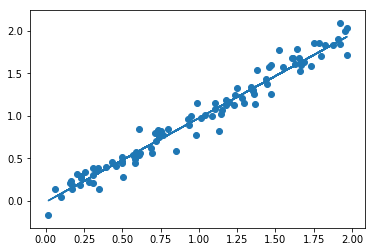

In [17]:
plt.plot(x, y_pred)
plt.scatter(x,y)

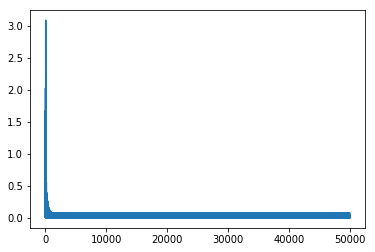

In [18]:
cnt = len(costs)
plt.plot(range(len(costs[:cnt])), costs[:cnt])


In [19]:
writer = tf.summary.FileWriter("/root/log", graph=tf.get_default_graph())